<a href="https://colab.research.google.com/github/jisu-nam/kubme_ai-Illjo/blob/master/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

데이터 준비

In [25]:
num_data = 1000
x = init.uniform(torch.Tensor(num_data,1),-5,5)

noise = init.normal_(torch.FloatTensor(num_data,1), std=2)

y1 = x**4 + x**2
y2 = x*2 + x

y1_noise = (x+noise)**4 + (x*noise)**2
y2_noise = (x+noise)**2 + (x*noise)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  


In [0]:
model1 = nn.Linear(in_features=1, out_features=1)
model2 = nn.Linear(in_features=1, out_features=1)
loss_func = nn.MSELoss()

In [0]:
optimizer1 = optim.SGD(model1.parameters(),lr=0.01)
optimizer2 = optim.SGD(model2.parameters(),lr=0.01)

In [0]:
label1 = y1_noise
label2 = y2_noise

num_epoch = 500

losses1 = []
losses2 = []

Y1

In [53]:
if torch.cuda.is_available():
  model1 = model1.cuda()
  x= x.cuda()
  label1 =  y1_noise.cuda()

for i in range(num_epoch):

  optimizer1.zero_grad()
  output1 = model1(x)

  loss = loss_func(output1, label1)
  loss.backward()

  optimizer1.step()

  if i % 10 == 0:
    print(loss.data.cpu())
    
  losses1.append(loss.data.cpu())

tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)
tensor(9.4547e+08)


In [0]:
num_test_data = 1000

model1 = model1.cpu()
test_data= init.uniform_(torch.Tensor(num_test_data,1), -5, 5)

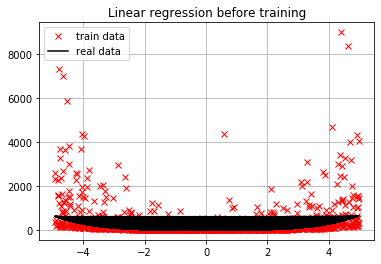

In [32]:
import matplotlib.pyplot as plt

x = x.cpu()

plt.plot(x.data, y1_noise.cpu().data, 'rx')
plt.plot(x.data, y1.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('Linear regression before training')
plt.grid(True)
plt.show()

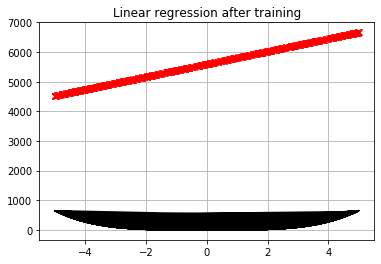

In [57]:
plt.plot(test_data.data, model1(test_data).data, 'rx')
plt.plot(test_data.data,(test_data**4)+(test_data**2), 'k-')
plt.title('Linear regression after training')
plt.grid(True)
plt.show()

In [43]:
model1.weight

Parameter containing:
tensor([[214.6256]], requires_grad=True)

Y2

In [58]:
if torch.cuda.is_available():
  model2 = model2.cuda()
  x= x.cuda()
  label2 =  y2_noise.cuda()

for i in range(num_epoch):

  optimizer2.zero_grad()
  output2 = model2(x)

  loss = loss_func(output2, label2)
  loss.backward()

  optimizer2.step()

  if i % 10 == 0:
    print(loss.data.cpu())
    
  losses2.append(loss.data.cpu())

tensor(4641.4829)
tensor(4641.4653)
tensor(4641.4541)
tensor(4641.4463)
tensor(4641.4409)
tensor(4641.4375)
tensor(4641.4355)
tensor(4641.4336)
tensor(4641.4326)
tensor(4641.4321)
tensor(4641.4316)
tensor(4641.4312)
tensor(4641.4312)
tensor(4641.4312)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)
tensor(4641.4307)


In [0]:
num_test_data = 1000

model2 = model2.cpu()
test_data = init.uniform_(torch.Tensor(num_test_data,1),-5,5)

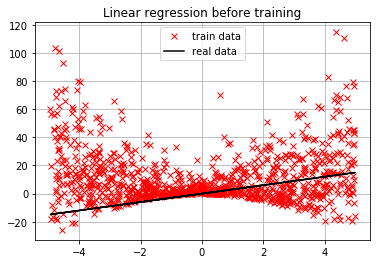

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

x = x.cpu()

plt.plot(x.data, y2_noise.cpu().data, 'rx')
plt.plot(x.data, y2.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('Linear regression before training')
plt.grid(True)
plt.show()

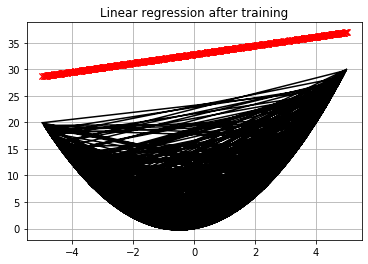

In [62]:
plt.plot(test_data.data, model2(test_data).data, 'rx')
plt.plot(test_data.data,test_data**2+test_data, 'k-')
plt.title('Linear regression after training')
plt.grid(True)
plt.show()

In [63]:
model2.weight

Parameter containing:
tensor([[0.8281]], requires_grad=True)